The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [408]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv("data/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [409]:
nobel[nobel['birth_date'].isna()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
gender_count = nobel.groupby('sex')['laureate_id'].count()
gender_count.sort_values(ascending=False)


sex
Male      905
Female     65
Name: laureate_id, dtype: int64

In [411]:
top_gender = 'Male'

In [412]:
nobel.groupby('birth_country')['laureate_id'].count().sort_values(ascending=False).iloc[:1]

birth_country
United States of America    291
Name: laureate_id, dtype: int64

In [413]:
top_country = 'United States of America'

In [414]:
US_born = nobel[nobel['birth_country'] == 'United States of America']
US_born['decade'] = (US_born['year']//10) *10

In [415]:
US_born.groupby('decade')['decade'].count().sort_values(ascending=False).iloc[:1]
max_decade_usa = 2000

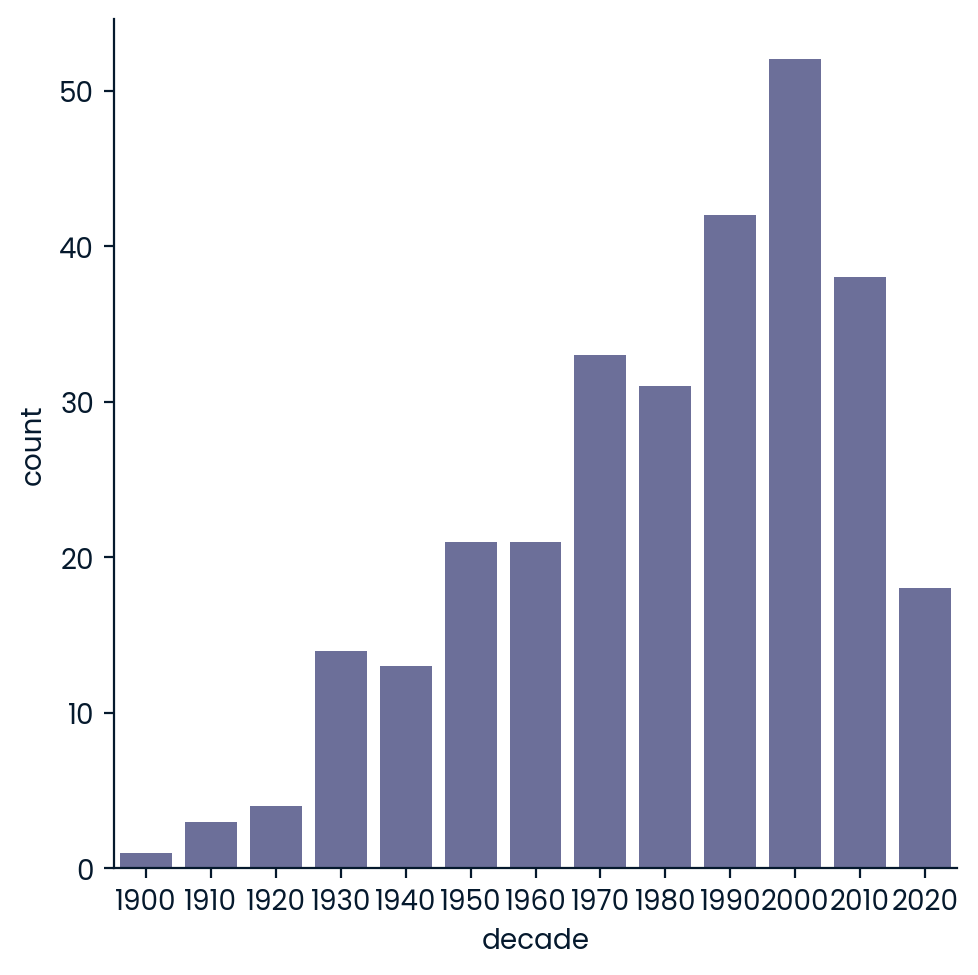

In [416]:
sns.catplot(kind='count',data=US_born,x='decade')

In [417]:
decade_count = US_born.groupby(['decade','sex'])['decade'].count()
decade_count

decade  sex   
1900    Male       1
1910    Male       3
1920    Male       4
1930    Female     2
        Male      12
1940    Female     1
        Male      12
1950    Male      21
1960    Male      21
1970    Female     1
        Male      32
1980    Female     2
        Male      29
1990    Female     2
        Male      40
2000    Female     3
        Male      49
2010    Female     1
        Male      37
2020    Female     5
        Male      13
Name: decade, dtype: int64

In [418]:
female_count = US_born.groupby(['decade','category'],as_index=False)['sex'].apply(lambda x: (x == 'Female').mean())
female_count

,decade,category,sex
0,1900,Peace,0.000000
1,1910,Chemistry,0.000000
2,1910,Peace,0.000000
3,1920,Peace,0.000000
4,1920,Physics,0.000000
5,1930,Chemistry,0.000000
6,1930,Literature,0.333333
7,1930,Medicine,0.000000
8,1930,Peace,0.500000
9,1930,Physics,0.000000


In [419]:
max_female = female_count.sort_values('sex',ascending=False).iloc[:1]
max_female_dict = {max_female['decade'].values[0]:max_female['category'].values[0]}
max_female_dict

{2020: 'Literature'}

In [420]:
female_nobel = nobel[nobel['sex'] == 'Female'].sort_values('year').iloc[:1]
female_nobel[['first_woman_name','first_category_name']] = female_nobel[['full_name','category']]
female_nobel[['first_woman_name','first_category_name']]
first_woman_name = 'Marie Curie, née Sklodowska'
first_woman_category = 'Physics'

In [421]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [422]:
name_count = nobel.groupby('full_name',as_index=False)['laureate_id'].count() 
duplicate_names = name_count[name_count['laureate_id'] > 1]
duplicate_names

,full_name,laureate_id
162,Comité international de la Croix Rouge (Intern...,3
284,Frederick Sanger,2
480,John Bardeen,2
576,Linus Carl Pauling,2
601,"Marie Curie, née Sklodowska",2
672,Office of the United Nations High Commissioner...,2


In [423]:
repeat_list = []
for i in duplicate_names['full_name']:
    repeat_list.append(i)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'John Bardeen',
 'Linus Carl Pauling',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']